In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import zipfile
import os
zip_file_path = 'Data Analyst.zip'


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')
os.listdir('/content/dataset')


['Give Life: Predict Blood Donations']

In [ ]:
folder_path = '/content/dataset/Give Life: Predict Blood Donations'
os.listdir(folder_path)


['datasets', 'notebook.ipynb']

In [ ]:
dataset_folder_path = '/content/dataset/Give Life: Predict Blood Donations/datasets'

os.listdir(dataset_folder_path)


['transfusion.data']

In [ ]:
# Inspect the DataFrame's structure
transfusion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   target                 748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
import pandas as pd
file_path = '/content/dataset/Give Life: Predict Blood Donations/datasets/transfusion.data'

transfusion = pd.read_csv(file_path)

print(transfusion.head())

   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0  


In [ ]:
# Rename the column
transfusion.rename(columns={'whether he/she donated blood in March 2007': 'target'}, inplace=True)

# Verify the change
print(transfusion.head(2))


   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   

   target  
0       1  
1       1  


In [ ]:
# target incidence (distribution of 0s and 1s)
print(transfusion['target'].value_counts(normalize=True).round(3))


target
0    0.762
1    0.238
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = transfusion.drop(columns=['target'])
y = transfusion['target']

# Split into training and testing datasets (80% train, 20% test), with stratification to maintain balance in target classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verify by printing the first 2 rows of X_train
print(X_train.head(2))


     Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
529                 2                  6                   1500             22
271                16                  7                   1750             28


In [ ]:
#variance of features in X_train
print(X_train.var().round(3))


Recency (months)              67.473
Frequency (times)             32.624
Monetary (c.c. blood)    2039028.756
Time (months)                599.952
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the training and test data
X_train_normed = scaler.fit_transform(X_train)
X_test_normed = scaler.transform(X_test)

# Convert the normalized data back to DataFrame for easier inspection
X_train_normed = pd.DataFrame(X_train_normed, columns=X_train.columns)
X_test_normed = pd.DataFrame(X_test_normed, columns=X_test.columns)

# Check the variance of the normalized data
print(pd.DataFrame(X_train_normed).var().round(3))


Recency (months)         1.002
Frequency (times)        1.002
Monetary (c.c. blood)    1.002
Time (months)            1.002
dtype: float64


In [ ]:
!pip install tpot


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.4 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=d4fa3c6c131c1bafbea4a03f1159e1805d6c77bceeb0858284bb21dffcd634a6
  Stored in directory: /root/.cache/pip/wheels/da/77/2d/adbc56bc4db95ad80c6d4e71cd69e2d9d122174904342e3f7f
Successfully built stopit


In [ ]:
# Import TPOTClassifier and roc_auc_score
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

# Initialize the TPOT classifier
tpot = TPOTClassifier(verbosity=2, random_state=42, scoring='roc_auc', generations=5, population_size=20)

# Train the TPOT model using the normalized training data
tpot.fit(X_train_normed, y_train)

# Get the AUC score for the TPOT model
tpot_auc_score = roc_auc_score(y_test, tpot.predict(X_test_normed))
print(f'TPOT AUC Score: {tpot_auc_score:.4f}')

# Display the best pipeline found by TPOT
print("Best pipeline:", tpot.fitted_pipeline_)


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7404119172752713

Generation 2 - Current best internal CV score: 0.7404119172752713

Generation 3 - Current best internal CV score: 0.7413352095537789

Generation 4 - Current best internal CV score: 0.747169488254303

Generation 5 - Current best internal CV score: 0.747169488254303

Best pipeline: MLPClassifier(ZeroCount(input_matrix), alpha=0.1, learning_rate_init=0.01)
TPOT AUC Score: 0.6499
Best pipeline: Pipeline(steps=[('zerocount', ZeroCount()),
                ('mlpclassifier',
                 MLPClassifier(alpha=0.1, learning_rate_init=0.01,
                               random_state=42))])


In [ ]:
# Make predictions using the best pipeline found by TPOT
y_pred_tpot = tpot.predict(X_test_normed)

# Calculate and print the AUC score for TPOT model
tpot_auc = roc_auc_score(y_test, y_pred_tpot)
print("TPOT AUC Score: ", round(tpot_auc, 4))


TPOT AUC Score:  0.6499


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model on the normalized training data
logreg.fit(X_train_normed, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_normed)

# Calculate the AUC score
logreg_auc_score = roc_auc_score(y_test, y_pred)
print(f'Logistic Regression AUC Score: {logreg_auc_score:.4f}')


Logistic Regression AUC Score: 0.5424


In [ ]:
from operator import itemgetter

# Create a list of model_name and model_score pairs
models = [("Logistic Regression", logreg_auc_score)]

# Sort the models by AUC score in descending order
sorted_models = sorted(models, key=itemgetter(1), reverse=True)

# Print the sorted models
for idx, (model_name, model_score) in enumerate(sorted_models, 1):
    print(f"Model {idx}: {model_name} with AUC Score: {model_score:.4f}")


Model 1: Logistic Regression with AUC Score: 0.5424


In [ ]:
# Compare AUC scores
print("Logistic Regression AUC Score: ", round(logreg_auc_score, 4))
print("TPOT AUC Score: ", round(tpot_auc, 4))


Logistic Regression AUC Score:  0.5424
TPOT AUC Score:  0.6499


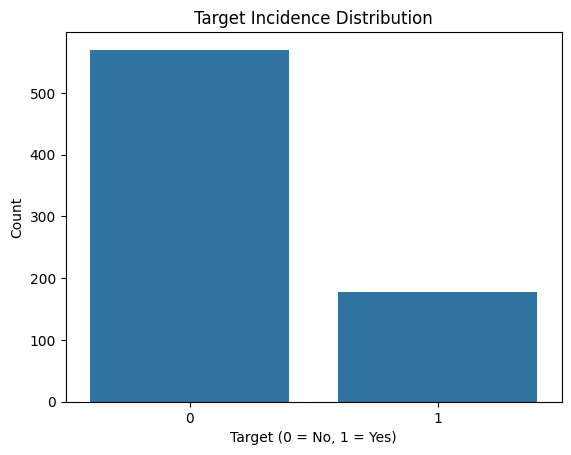

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot target incidence distribution
sns.countplot(x='target', data=transfusion)
plt.title('Target Incidence Distribution')
plt.xlabel('Target (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


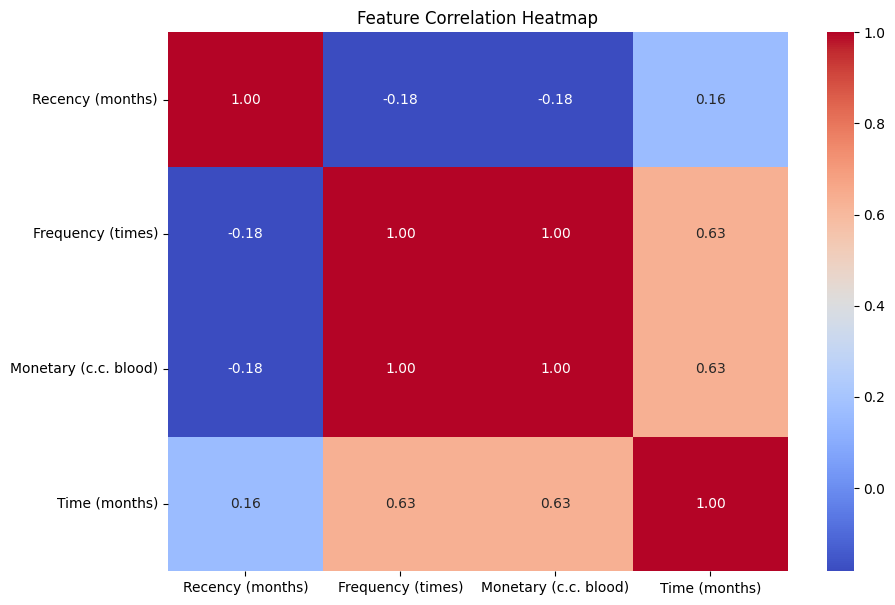

In [ ]:
# Calculate correlation matrix
corr_matrix = X.corr()
# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


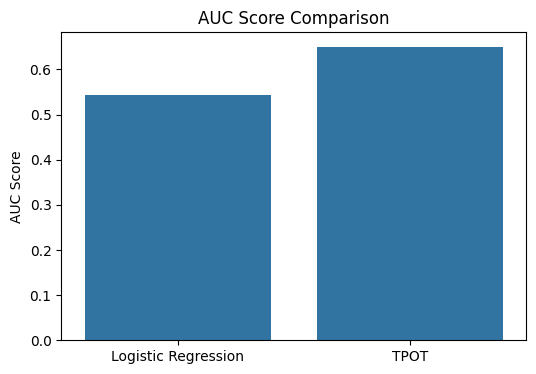

In [ ]:
# AUC scores of models
model_auc_scores = {
    'Logistic Regression': logreg_auc_score,
    'TPOT': tpot_auc_score
}

# Plot AUC scores
plt.figure(figsize=(6, 4))
sns.barplot(x=list(model_auc_scores.keys()), y=list(model_auc_scores.values()))
plt.title('AUC Score Comparison')
plt.ylabel('AUC Score')
plt.show()


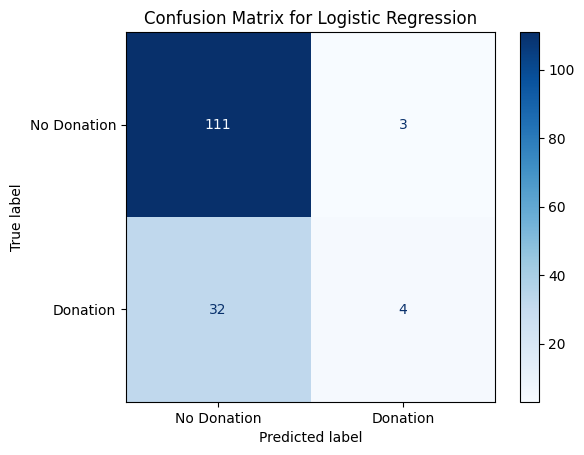

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Donation', 'Donation'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()



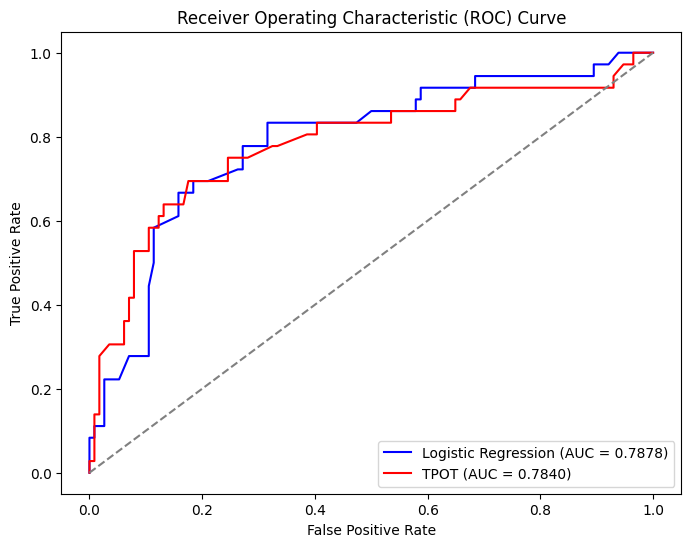

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test_normed)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.4f})')

# ROC curve for TPOT model
fpr_tpot, tpr_tpot, _ = roc_curve(y_test, tpot.predict_proba(X_test_normed)[:, 1])
roc_auc_tpot = auc(fpr_tpot, tpr_tpot)
plt.plot(fpr_tpot, tpr_tpot, color='red', label=f'TPOT (AUC = {roc_auc_tpot:.4f})')

# Add plot details
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
